# Numerical simulation of the commutator equation

This notebook uses the `matrix_commutator_solver` module to integrate the matrix ODE

$$\frac{\mathrm{d}}{\mathrm{d}t} G(t) = -2\mathrm{i}\,[G(t),h],$$

for an open chain with $L=2$ and $L=3$.  We plot the quantity

$1 + 2\,G_{0,0}(t)$

which for the Ising model corresponds to the expectation value $\langle\sigma_1^z(t)\rangle$ in the Jordan–Wigner representation.  Analytical arguments show this quantity equals $\cos(2Jt)$ for all system sizes $L\ge 2$.

The matrices are defined in `matrix_commutator_solver.py`, and the computation here
uses a simple forward Euler discretization.  For sufficiently small time steps
(`steps`), the numeric solution approximates the analytic result.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matrix_commutator_solver import compute_time_series

# Define a helper to run and plot for a given L
def run_and_plot(L, J=1.0, T=10.0, steps=2000):
    times, values = compute_time_series(L=L, J=J, T=T, steps=steps)
    # Since values can acquire tiny imaginary parts from numerical errors, take the real part
    values = values.real
    plt.figure(figsize=(8, 4))
    plt.plot(times, values, label=f'L={L}')
    plt.xlabel('Time $t$')
    plt.ylabel(r'$1 + 2\, G_{0,0}(t)$')
    plt.title(f'Boundary magnetization for L={L}')
    plt.grid(True)
    plt.legend()
    plt.show()
    return times, values


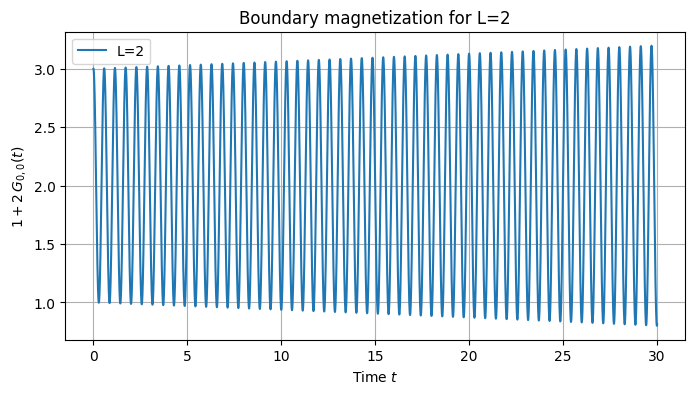

In [22]:
# Simulation parameters
J = 5.5
T = 30.0
steps = 300000

# Run simulation for L=2
times2, values2 = run_and_plot(L=2, J=J, T=T, steps=steps)


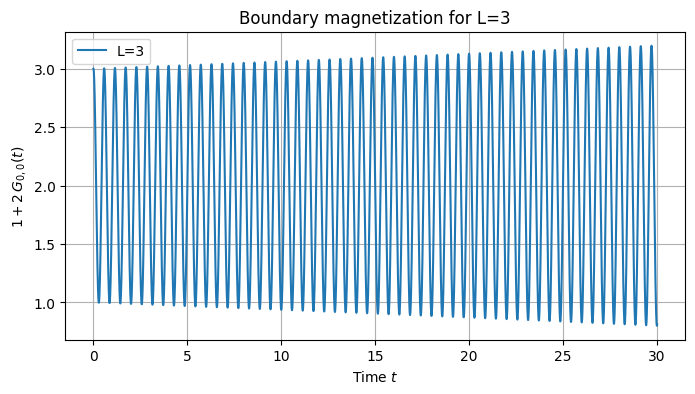

In [23]:
# Run simulation for L=3
times3, values3 = run_and_plot(L=3, J=J, T=T, steps=steps)


In [16]:
# Import statistical analysis functions
from statistical_model_fit import compare_with_analytical, print_summary_statistics, create_summary_plot

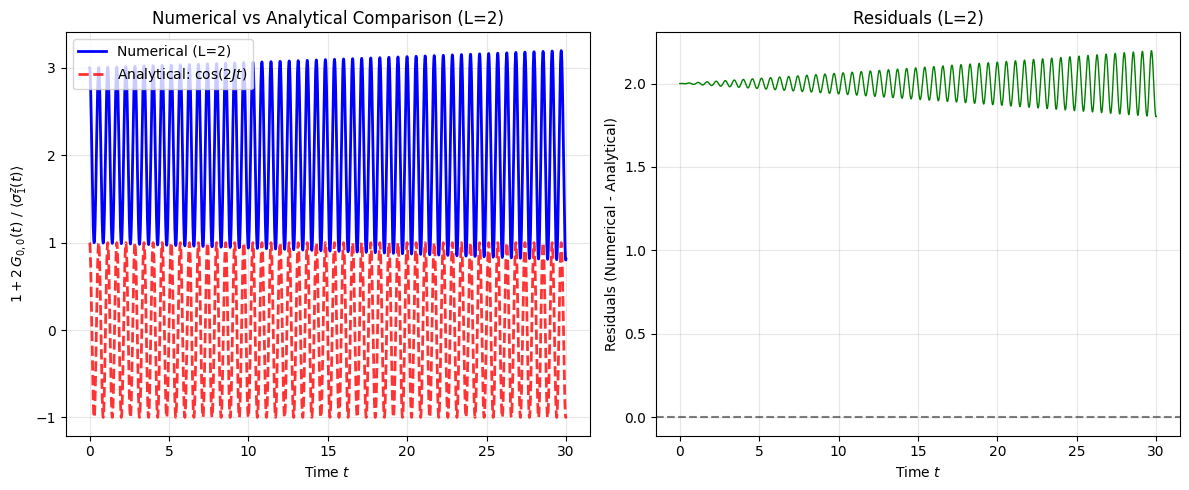


=== Statistical Comparison for L=2 ===
Correlation coefficient: 0.998630
P-value: 0.00e+00
R-squared: -7.008752
Mean Squared Error: 4.01e+00
Chi-squared: 2402633.58
Reduced Chi-squared: 8.0088


In [24]:
# Statistical analysis for L=2
stats2 = compare_with_analytical(times2, values2, J=J, L=2)

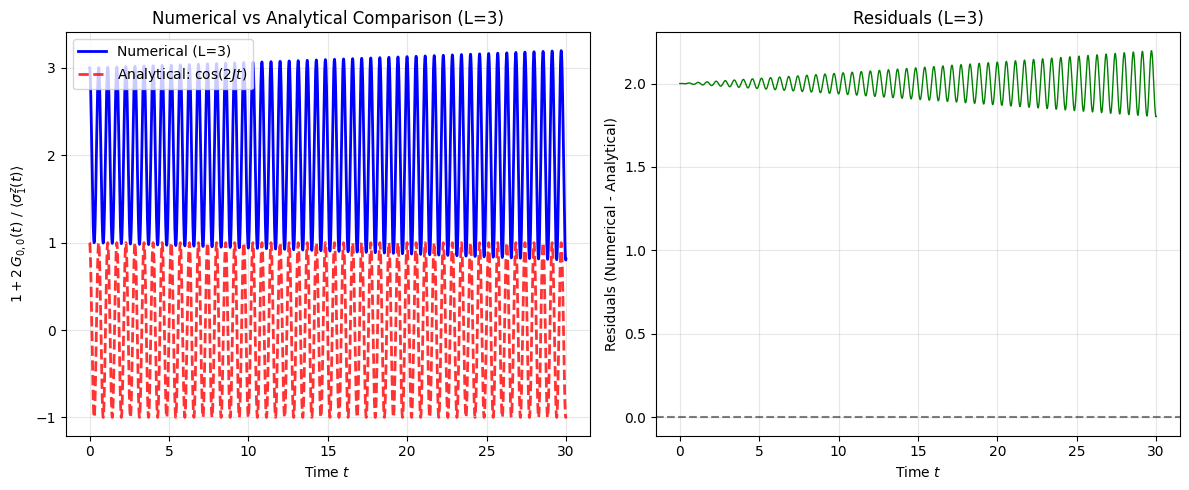


=== Statistical Comparison for L=3 ===
Correlation coefficient: 0.998630
P-value: 0.00e+00
R-squared: -7.008752
Mean Squared Error: 4.01e+00
Chi-squared: 2402633.58
Reduced Chi-squared: 8.0088


In [25]:
# Statistical analysis for L=3
stats3 = compare_with_analytical(times3, values3, J=J, L=3)

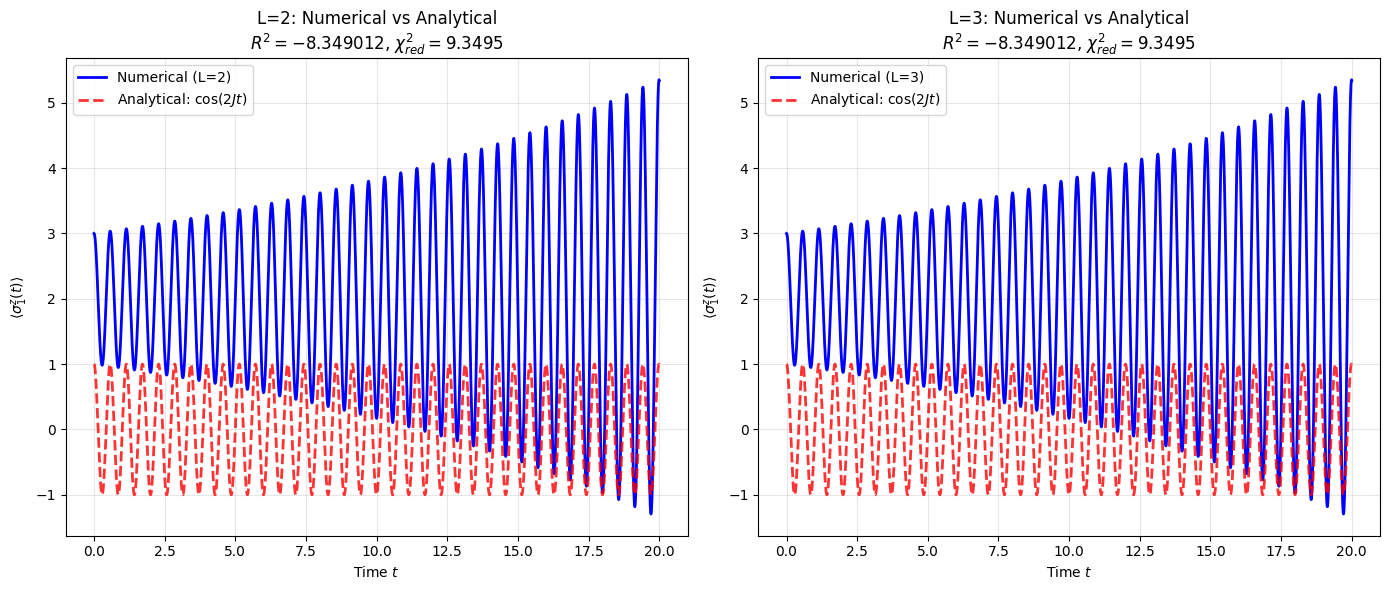


SUMMARY OF STATISTICAL ANALYSIS
Metric               L=2             L=3            
----------------------------------------------------
R-squared            -8.349012       -8.349012      
Correlation          0.945229        0.945229       
P-value              0.00e+00        0.00e+00       
MSE                  4.68e+00        4.68e+00       
Chi-squared          186989.59       186989.59      
Reduced Chi-sq       9.3495          9.3495         


In [19]:
# Summary comparison using the statistical analysis module
times_dict = {'L=2': times2, 'L=3': times3}
values_dict = {'L=2': values2, 'L=3': values3}
stats_dict = {'L=2': stats2, 'L=3': stats3}

# Create summary comparison plot
create_summary_plot(times_dict, values_dict, stats_dict, J=J)

# Print comprehensive statistical summary
print_summary_statistics(stats_dict)